In [1]:
import pandas as pd
import time
import numpy as np
np.seterr(invalid='ignore')
import nbimporter
from PPP import PPP
from defense_PPP import defense_PPP
from court import create_court
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import json
pd.options.display.max_columns = 999

In [2]:
file_path = 'Nuggets/data/Offense/Team.json'
defense_path = 'Nuggets/data/Defense/Team.json'

with open (file_path, 'r') as f:
    file = json.load(f)
    
with open (defense_path, 'r') as d:
    defense_file = json.load(d)
    
print(file.keys())

dict_keys(['ovr_data', 'SMZ2', '3ptZ2', 'Rim', 'SMZ3', '3ptZ1', '3ptZ3', 'SMZ1 ', '3ptZ4', 'LMZ3', '3ptZ5', 'LMZ1', 'LMZ2'])


In [3]:
data_PPP = file['ovr_data']['data']
data_PPP = pd.DataFrame(data_PPP).transpose()
data_PPP = PPP(data_PPP)
data_PPP

,Total PPP,% of Poss.,Total TO,Total Creation %,Total FTR,Total TS%,Total SQ,Total 2pt FGA,Total 2pt FG%,Total 2pt SQ,Total 3pt FGA,Total 3pt FG%,Total 3pt SQ,Shooting PPP,% of Shooting Poss.,Shooting TO,Shooting Freq.,Shooting FTR,Shooting TS%,Shooting SQ,Shooting 2pt Poss.,Shooting 2pt FG%,Shooting 2pt SQ,Shooting 3pt Poss.,Shooting 3pt FG%,Shooting 3pt SQ,Creation PPP,% of Creation Poss.,Creation TO,Creation %,Creation FTR,Creation TS%,Creation SQ,Creation 2pt Poss.,Creation 2pt FG%,Creation 2pt SQ,Creation 3pt Poss.,Creation 3pt FG%,Creation 3pt SQ
PNR Ball Handler,1.17,15.9,2,43.7,0.17,66.21,3.5,13,53.8,3.31,5,60.0,4.0,0.83,12.1,2,56.3,0.0,50.0,3.5,8,33.3,3.33,4,50.0,3.75,1.61,26.6,0,43.7,0.38,84.46,3.5,8,71.4,3.29,1,100.0,3.75
PNR Screener,1.5,5.5,2,0.0,0.75,112.7,3.0,3,100.0,2.33,1,100.0,5.0,1.5,7.4,2,100.0,0.75,112.7,3.0,6,100.0,2.33,1,100.0,5.0,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,5.0
DHO Ball Handler,1.67,4.5,0,16.7,0.0,83.33,3.5,5,100.0,3.4,1,0.0,4.0,1.6,5.1,0,83.3,0.0,80.0,3.8,4,100.0,3.75,1,0.0,4.0,2.0,2.9,0,16.7,0.0,100.0,2.0,1,100.0,2.0,0,N/A,4.0
DHO Screener,2.0,0.7,0,100.0,0.0,100.0,3.0,1,100.0,3.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,2.0,2.9,0,100.0,0.0,100.0,3.0,1,100.0,3.0,0,N/A,N/A
ISOLATION,1.08,23.5,5,26.4,0.35,71.19,2.74,16,62.5,2.31,7,57.1,3.71,0.86,23.4,5,73.6,0.31,60.83,2.44,19,57.1,2.29,4,50.0,3.5,1.68,23.8,0,26.4,0.43,94.09,3.43,3,100.0,2.5,5,60.0,3.5
TRANSITION,0.85,18.5,2,43.9,0.19,47.99,3.67,11,72.7,3.55,10,10.0,3.8,0.65,14.0,2,56.1,0.18,39.34,3.36,8,57.1,3.14,5,0.0,3.75,1.1,31.1,0,43.9,0.2,57.47,4.0,4,100.0,4.25,6,16.7,3.75
Attacking Closeouts,1.44,7.8,0,19.2,0.1,75.0,3.0,9,66.7,2.78,1,100.0,5.0,1.18,8.5,0,80.8,0.12,62.5,2.75,8,62.5,2.75,0,N/A,N/A,2.5,5.7,0,19.2,0.0,125.0,4.0,1,100.0,3.0,1,100.0,N/A
Catch & Shoot,1.07,10.4,0,0.0,0.0,53.57,3.93,0,N/A,N/A,14,35.7,3.93,1.07,14.1,0,100.0,0.0,53.57,3.93,0,N/A,N/A,14,35.7,3.93,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,3.93
Off Ball Screens,1.0,3.0,0,25.0,0.0,50.0,4.0,2,100.0,4.0,2,0.0,4.0,0.67,3.0,0,75.0,0.0,33.33,3.67,1,100.0,3.0,2,0.0,4.0,2.0,2.9,0,25.0,0.0,100.0,5.0,1,100.0,5.0,0,N/A,4.0
Cutting,1.72,7.4,1,10.1,0.25,100.71,3.88,8,100.0,3.88,0,N/A,N/A,1.69,9.0,1,89.9,0.29,100.81,3.86,8,100.0,3.86,0,N/A,N/A,2.0,2.9,0,10.1,0.0,100.0,4.0,1,100.0,4.0,0,N/A,N/A


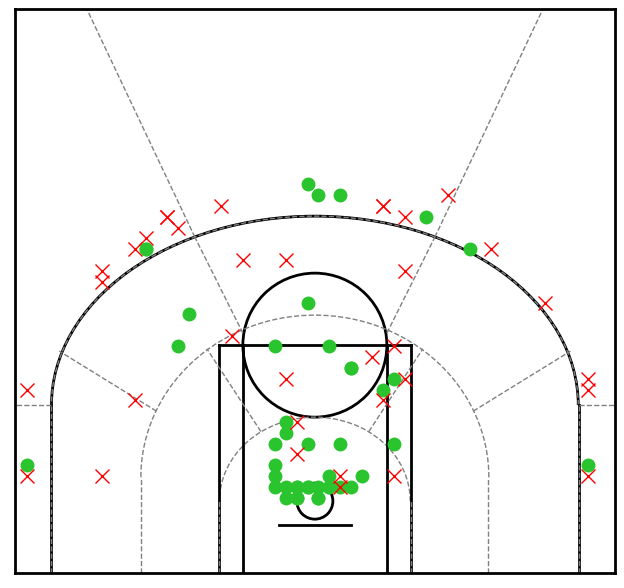

In [4]:
shots = file['ovr_data']['shooting_locations']

# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
# Draw basketball court
fig = plt.figure(figsize=(6, 5.64))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')

for shot in shots:
    x = shot[0][0]
    y = shot[0][1] + 60
    res = shot[1]
    if res == 1:
        ax.plot(x,y, marker='o', color='#29c42e', markersize=9)
    if res == 0:
        ax.plot(x,y, marker='x', color='red', markersize=10)
        '''
    if res == 11: # Free Throws
        ax.plot(x,y, marker='^', color='#2393de', markersize=10)
    if res == 20: # Turnovers
        ax.plot(x,y, marker='D', color='#f5c133', markersize=8)
    if res == 30: # And-1
        ax.plot(x,y, marker='P', color='#e00ddd', markersize=10)
        '''
plt.show()

In [5]:
def_PPP = defense_file['ovr_data']['data']
def_PPP = pd.DataFrame(def_PPP).transpose()
def_PPP = defense_PPP(def_PPP)
def_PPP

,Total PPP,% of Poss.,Total TO,Total Creation %,Total FTR,Total TS%,Total SQ,Total 2pt FGA,Total 2pt FG%,Total 2pt SQ,Total 3pt FGA,Total 3pt FG%,Total 3pt SQ,Shooting PPP,% of Shooting Poss.,Shooting TO,Shooting Freq.,Shooting FTR,Shooting TS%,Shooting SQ,Shooting 2pt Poss.,Shooting 2pt FG%,Shooting 2pt SQ,Shooting 3pt Poss.,Shooting 3pt FG%,Shooting 3pt SQ,Creation PPP,% of Creation Poss.,Creation TO,Creation %,Creation FTR,Creation TS%,Creation SQ,Creation 2pt Poss.,Creation 2pt FG%,Creation 2pt SQ,Creation 3pt Poss.,Creation 3pt FG%,Creation 3pt SQ
PNR Ball Handler,0.45,13.8,0,72.7,0.0,22.73,3.0,8,12.5,3.12,3,33.3,2.67,0.0,5.4,0,27.3,0.0,0.0,4.0,3,0.0,4.0,0,N/A,N/A,0.62,33.3,0,72.7,0.0,31.25,2.62,5,20.0,2.6,3,33.3,N/A
PNR Screener,1.2,6.2,0,40.0,0.0,60.0,3.2,3,100.0,3.67,2,0.0,2.5,1.33,5.4,0,60.0,0.0,66.67,2.67,2,100.0,3.0,1,0.0,2.0,1.0,8.3,0,40.0,0.0,50.0,4.0,1,100.0,5.0,1,0.0,2.0
DHO Ball Handler,0.0,2.5,0,50.0,0.0,0.0,3.0,0,N/A,N/A,2,0.0,3.0,0.0,1.8,0,50.0,0.0,0.0,3.0,0,N/A,N/A,1,0.0,3.0,0.0,4.2,0,50.0,0.0,0.0,3.0,0,N/A,N/A,1,0.0,3.0
DHO Screener,3.0,1.2,0,100.0,0.0,150.0,5.0,0,N/A,N/A,1,100.0,5.0,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,3.0,4.2,0,100.0,0.0,150.0,5.0,0,N/A,N/A,1,100.0,N/A
ISOLATION,0.73,18.8,3,0.0,0.0,45.83,2.5,10,40.0,2.4,2,50.0,3.0,0.73,26.8,3,100.0,0.0,45.83,2.5,13,40.0,2.4,2,50.0,3.0,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,3.0
TRANSITION,0.67,11.2,0,22.2,0.0,33.33,2.67,6,50.0,2.33,3,0.0,3.33,0.57,12.5,0,77.8,0.0,28.57,2.71,4,50.0,2.25,3,0.0,3.33,1.0,8.3,0,22.2,0.0,50.0,2.5,2,50.0,2.5,0,N/A,3.33
Attacking Closeouts,0.67,7.5,0,33.3,0.0,33.33,3.17,6,33.3,3.17,0,N/A,N/A,0.5,7.1,0,66.7,0.0,25.0,2.5,4,25.0,2.5,0,N/A,N/A,1.0,8.3,0,33.3,0.0,50.0,4.5,2,50.0,4.5,0,N/A,N/A
Catch & Shoot,1.11,23.8,0,26.3,0.0,55.26,3.68,0,N/A,N/A,19,36.8,3.68,1.07,25.0,0,73.7,0.0,53.57,3.57,0,N/A,N/A,14,35.7,3.57,1.2,20.8,0,26.3,0.0,60.0,4.0,0,N/A,N/A,5,40.0,3.57
Off Ball Screens,1.25,5.0,1,25.0,0.0,83.33,2.33,2,50.0,1.5,1,100.0,4.0,1.67,5.4,0,75.0,0.0,83.33,2.33,2,50.0,1.5,1,100.0,4.0,0.0,4.2,1,25.0,0.0,N/A,N/A,1,N/A,N/A,0,N/A,4.0
Cutting,1.6,6.2,0,40.0,0.0,80.0,3.6,5,80.0,3.6,0,N/A,N/A,1.33,5.4,0,60.0,0.0,66.67,3.67,3,66.7,3.67,0,N/A,N/A,2.0,8.3,0,40.0,0.0,100.0,3.5,2,100.0,3.5,0,N/A,N/A


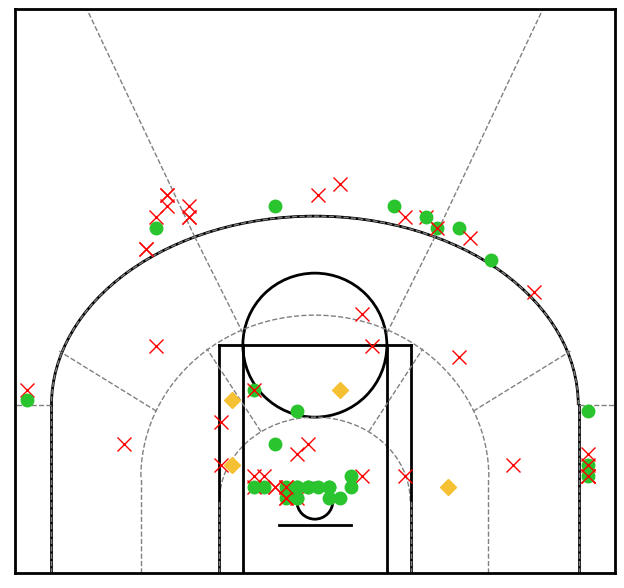

In [7]:
def_shots = defense_file['ovr_data']['shooting_locations']

# Draw basketball court
def_fig = plt.figure(figsize=(6, 5.64))
def_ax = def_fig.add_axes([0, 0, 1, 1])
def_ax = create_court(def_ax, 'black')

for shot in def_shots:
    x = shot[0][0]
    y = shot[0][1] + 60
    res = shot[1]
    if res == 1:
        def_ax.plot(x,y, marker='o', color='#29c42e', markersize=9)
    if res == 0:
        def_ax.plot(x,y, marker='x', color='red', markersize=10)
    if res == 11: # Free Throws
        def_ax.plot(x,y, marker='^', color='#2393de', markersize=10)
    if res == 20: # Turnovers
        def_ax.plot(x,y, marker='D', color='#f5c133', markersize=8)
    if res == 30: # And-1
        def_ax.plot(x,y, marker='P', color='#e00ddd', markersize=10)
    
plt.show()